In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Here, we are running model using tf_pose and for this we need to be sure that tensorflow has version of lower than 2 and hence we have chosen 1.x

In [2]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [2]:
# !git clone https://github.com/ildoonet/tf-pose-estimation.git > /dev/null
# %cd /content/tf-pose-estimation
# !pip -q install -r requirements.txt
# !python setup.py install

In [3]:
import argparse
import logging
import sys
import time

from tf_pose import common
import cv2
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
import matplotlib.pyplot as plt
%matplotlib inline

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




In [ ]:
size = '432x368'
model = 'mobilenet_thin'

In [ ]:
w, h = model_wh(size)
if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path(model), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

[2020-11-09 15:41:38,469] [TfPoseEstimator] [INFO] loading graph from /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose_data/graph/mobilenet_thin/graph_opt.pb(default size=432x368)
2020-11-09 15:41:38,469 INFO loading graph from /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose_data/graph/mobilenet_thin/graph_opt.pb(default size=432x368)


2020-11-09 15:41:38,475 WARNING From /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose/estimator.py:311: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



2020-11-09 15:41:38,477 WARNING From /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose/estimator.py:312: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.



2020-11-09 15:41:38,506 WARNING From /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose/estimator.py:330: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



2020-11-09 15:41:38,603 WARNING From /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose/estimator.py:332: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D_bn_offset
TfPoseEstimator/M

2020-11-09 15:41:38,801 WARNING From /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose/estimator.py:341: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



2020-11-09 15:41:38,824 WARNING From /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose/estimator.py:342: The name tf.image.resize_area is deprecated. Please use tf.compat.v1.image.resize_area instead.



2020-11-09 15:41:38,842 WARNING From /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose/tensblur/smoother.py:96: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2020-11-09 15:41:38,860 WARNING From /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose/estimator.py:354: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2020-11-09 15:41:38,863 WARNING From /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose/estimator.py:359: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



2020-11-09 15:41:38,869 WARNING From /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose/estimator.py:360: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



2020-11-09 15:41:38,871 WARNING From /usr/local/lib/python3.6/dist-packages/tf_pose-0.1.1-py3.6-linux-x86_64.egg/tf_pose/estimator.py:362: The name tf.report_uninitialized_variables is deprecated. Please use tf.compat.v1.report_uninitialized_variables instead.



# **loading Images from Google Drive**

In [ ]:
import os
import pandas as pd

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

os.chdir("/content/drive")

In [ ]:

os.getcwd()

'/content/drive'

In [ ]:
for root, dirs, files in os.walk("/content/drive", topdown=False):
   for name in files:
      print(os.path.join(root, name))
   for name in dirs:
      print(os.path.join(root, name))

/content/drive/My Drive/USF/VISA PROCESS - ELABORATED.pdf
/content/drive/My Drive/USF/Statement_of_Purpose.docx
/content/drive/My Drive/USF/Statement_of_Purpose.pdf
/content/drive/My Drive/USF/Superuser_380773_1366188.zip
/content/drive/My Drive/USF/UCONN_ACCEPTANCE.pdf
/content/drive/My Drive/USF/UCONN_DECISION.pdf
/content/drive/My Drive/USF/USF_Application.pdf
/content/drive/My Drive/USF/UTD_AD_AAA.pdf
/content/drive/My Drive/USF/UTSCHOLARSHIP.pdf
/content/drive/My Drive/USF/VISA_SCANNED.pdf
/content/drive/My Drive/USF/Tuition and Fees.pdf
/content/drive/My Drive/USF/1366188_RL.pdf
/content/drive/My Drive/USF/Affidavit of Support.pdf
/content/drive/My Drive/USF/1366188_SC.pdf
/content/drive/My Drive/USF/Apply for a U.S. Visa _ Receipt for Payment.pdf
/content/drive/My Drive/USF/AppointmentConfirmationVISA.pdf
/content/drive/My Drive/USF/approval__letter.docx
/content/drive/My Drive/USF/approval_letter.docx
/content/drive/My Drive/USF/DS160-APPLICATION.pdf
/content/drive/My Drive/USF

In [ ]:

cutDir = '/content/drive/My Drive/training_set/Upper_Cut'
cutimages = os.listdir(cutDir)
print(cutimages)

['IMG-20201107-WA0013.jpg', 'IMG-20201107-WA0061.jpg', 'download (3).jpg', 'IMG-20201107-WA0075.jpg', 'download.jpg', 'IMG-20201107-WA0030.jpg', 'IMG-20201107-WA0040.jpg', 'download (1).jpg', 'IMG-20201107-WA0032.jpg', 'IMG-20201107-WA0060.jpg', 'download (2).jpg', 'IMG-20201107-WA0078.jpg', 'IMG-20201107-WA0022.jpg', 'download (4).jpg', 'IMG-20201107-WA0041.jpg', 'IMG-20201107-WA0044.jpg', 'images.jpg', 'IMG-20201107-WA0065.jpg', 'download (5).jpg', 'IMG-20201107-WA0034.jpg', 'IMG-20201107-WA0025.jpg', 'IMG-20201107-WA0052.jpg']


In [ ]:

cutShots = []
cutFiles=[]
for img in cutimages:
    image = common.read_imgfile(cutDir+'/'+img, None, None)
    humans = e.inference(npimg=image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
    if len(humans)>0:
        cutShots.append(humans[0])
        cutFiles.append(image)
print("Cut Shot Examples: ",len(cutFiles))

Cut Shot Examples:  20


In [ ]:

sweepDir = '/content/drive/My Drive/training_set/Sweep_Shot/'
sweepimages = os.listdir(sweepDir)

In [ ]:

sweepShots = []
sweepFiles=[]
for img in sweepimages:
    image = common.read_imgfile(sweepDir+img, None, None)
    humans = e.inference(npimg=image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
    if len(humans)>0:
        sweepShots.append(humans[0])
        sweepFiles.append(image)
print("Sweep  Examples: ",len(sweepFiles))

Sweep  Examples:  42


In [ ]:
coverDir = '/content/drive/My Drive/training_set/Cover_Drive'
coverimages = os.listdir(coverDir)

In [ ]:
coverShots = []
coverFiles=[]
for img in coverimages:
    image = common.read_imgfile(coverDir+'/'+img, None, None)
    humans = e.inference(npimg=image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
    if len(humans)>0:
        coverShots.append(humans[0])
        coverFiles.append(image)
print("cover Examples:",len(coverFiles))

cover Examples: 39


In [ ]:
pullDir = '/content/drive/My Drive/training_set/Pull_Shot'
pullimages = os.listdir(pullDir)

In [ ]:
pullShots = []
pullFiles=[]
for img in pullimages:
    image = common.read_imgfile(pullDir+'/'+img, None, None)
    humans = e.inference(npimg=image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
    if len(humans)>0:
        pullShots.append(humans[0])
        pullFiles.append(image)
print("Pull Examples: ",len(pullFiles))

Pull Examples:  39


In [ ]:
def humanToDict(hum):
    resultDict = {}
    parts = hum.body_parts.keys()
    for p in parts:
        resultDict[str(p)+'_x'] = hum.body_parts[p].x
        resultDict[str(p)+'_y'] = hum.body_parts[p].y
        #resultDict[str(p)+'_p'] = hum.body_parts[p].p
    return resultDict

In [ ]:
cutList = []
for sh in cutShots:
    cutList.append(humanToDict(sh))
    
cutdf = pd.DataFrame(cutList)
#standHumadf['img'] = standFiles
cutdf.head()

1_x       1_y       2_x       2_y  ...      17_x      17_y  7_x  7_y
0  0.347222  0.396739  0.314815  0.423913  ...       NaN       NaN  NaN  NaN
1  0.564815  0.342391  0.643519  0.342391  ...       NaN       NaN  NaN  NaN
2  0.370370  0.369565  0.324074  0.375000  ...  0.379630  0.326087  NaN  NaN
3  0.449074  0.260870  0.537037  0.239130  ...  0.388889  0.222826  NaN  NaN
4  0.750000  0.336957       NaN       NaN  ...  0.782407  0.277174  NaN  NaN

[5 rows x 36 columns]

In [ ]:
sweepList = []
for jh in sweepShots:
    sweepList.append(humanToDict(jh))

sweepdf = pd.DataFrame(sweepList)
sweepdf.head()

0_x       0_y       1_x  ...      17_y      16_x      16_y
0  0.314815  0.168478  0.379630  ...  0.130435       NaN       NaN
1  0.194444  0.336957  0.231481  ...  0.288043  0.148148  0.326087
2  0.402778  0.157609  0.412037  ...  0.135870  0.347222  0.141304
3  0.810185  0.228261  0.847222  ...  0.250000       NaN       NaN
4  0.254630  0.271739  0.287037  ...  0.222826  0.208333  0.293478

[5 rows x 36 columns]

In [ ]:
driveList = []
for jh in coverShots:
    driveList.append(humanToDict(jh))

drivedf = pd.DataFrame(driveList)
drivedf.head()

1_x       1_y       2_x  ...      10_y      16_x      16_y
0  0.305556  0.157609  0.314815  ...       NaN       NaN       NaN
1  0.689815  0.179348  0.592593  ...       NaN       NaN       NaN
2  0.490741  0.222826  0.393519  ...       NaN       NaN       NaN
3  0.638889  0.250000  0.550926  ...       NaN       NaN       NaN
4  0.439815  0.217391  0.486111  ...  0.880435  0.476852  0.168478

[5 rows x 36 columns]

In [ ]:
pullList = []
for jh in pullShots:
    pullList.append(humanToDict(jh))

pulldf = pd.DataFrame(pullList)
pulldf.head()

0_x       0_y       1_x  ...      13_y      17_x      17_y
0  0.472222  0.168478  0.379630  ...       NaN       NaN       NaN
1  0.490741  0.125000  0.472222  ...       NaN       NaN       NaN
2  0.398148  0.190217  0.398148  ...  0.809783  0.425926  0.146739
3  0.782407  0.190217  0.787037  ...  0.445652  0.791667  0.184783
4  0.324074  0.152174  0.282407  ...       NaN  0.356481  0.135870

[5 rows x 36 columns]

In [ ]:

sweepdf.shape, cutdf.shape, drivedf.shape,pulldf.shape

((42, 36), (20, 36), (39, 36), (39, 36))

In [ ]:
sweepdf['pose']=0
cutdf['pose']=1
drivedf['pose']=2
pulldf['pose']=3

alldata = sweepdf.append(cutdf)
alldata = alldata.append(drivedf)
alldata = alldata.append(pulldf)

alldata = alldata.reset_index(drop = True)
alldata.shape

(140, 37)

In [ ]:
allFiles = sweepFiles + cutFiles + coverFiles + pullFiles
allShots = sweepShots + cutShots + coverShots + pullShots

In [ ]:
def min_max_normalize(df):
    xcols = [c for c in df.columns if 'x' in c]
    xdf = df[xcols]
    xdf = xdf.subtract(xdf.min(axis=1), axis=0)
    xdf = xdf.divide(xdf.max(axis=1), axis=0)
    
    ycols = [c for c in df.columns if 'y' in c]
    ydf = df[ycols]
    ydf = ydf.subtract(ydf.min(axis=1), axis=0)
    ydf = ydf.divide(ydf.max(axis=1), axis=0)
    if 'pose' in df.columns:
        resultdf =  pd.concat( [xdf,ydf, df[['pose']]], axis=1 )
    else:
        resultdf =  pd.concat( [xdf,ydf], axis=1 )
    return resultdf

In [ ]:
alldata = min_max_normalize(alldata)

In [ ]:
from sklearn.ensemble  import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
alldata.head(2)

0_x       1_x       2_x       3_x  ...      15_y  17_y      16_y  pose
0  0.095238  0.317460  0.174603  0.190476  ...  0.031250   0.0       NaN     0
1  0.390625  0.515625  0.296875  0.531250  ...  0.029703   0.0  0.069307     0

[2 rows x 37 columns]

In [ ]:

treatData = alldata.copy()

In [ ]:
treatData = treatData.fillna(-1)

In [ ]:
X = treatData[[c for c in treatData.columns if c != 'pose']]
X['img'] = allFiles
X['human'] = allShots
Y = treatData['pose']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2019, shuffle=True)
#X_train, X_test, y_train, y_test = (X,X,Y,Y)

testImg = X_test.img
testHuman = X_test.human
X_train = np.array(X_train[[c for c in X_train.columns if c not in ['img','human'] ]]) 
X_test = np.array(X_test[[c for c in X_test.columns if c not in ['img','human'] ]]) 

print(X_train.shape)

clf = rfc(max_depth=5, n_estimators=10, random_state=2019)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

(98, 36)
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.67      0.29      0.40         7
           2       0.42      0.56      0.48         9
           3       0.57      0.67      0.62        12

    accuracy                           0.60        42
   macro avg       0.61      0.56      0.56        42
weighted avg       0.62      0.60      0.59        42



Model has accuracy of 60% which is better than MLP and CNN which we used before.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


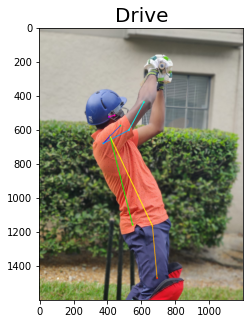

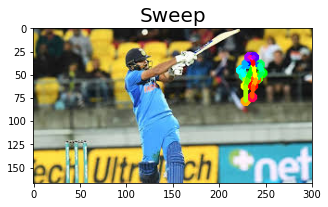

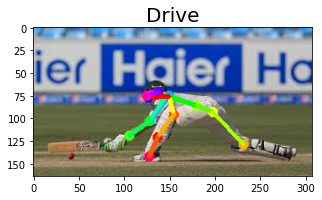

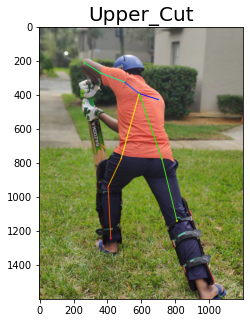

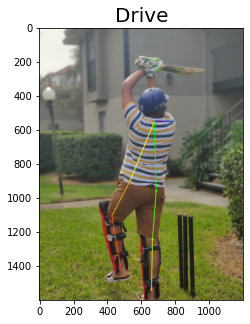

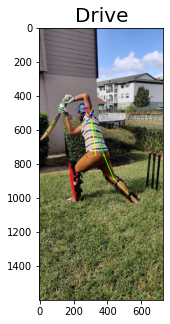

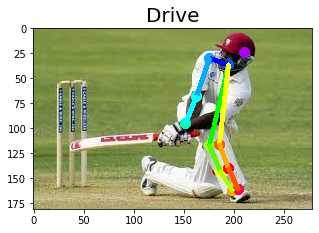

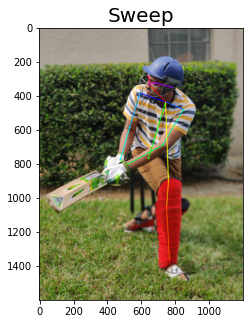

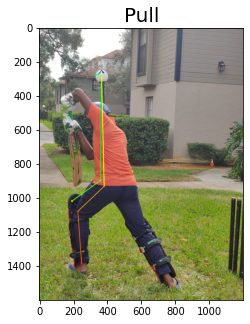

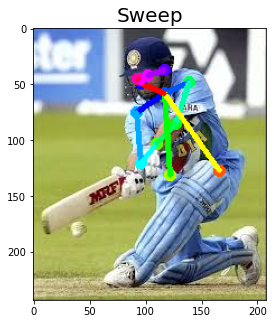

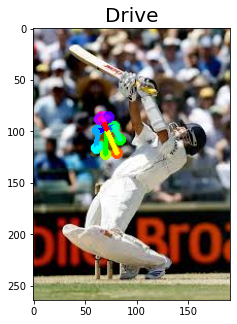

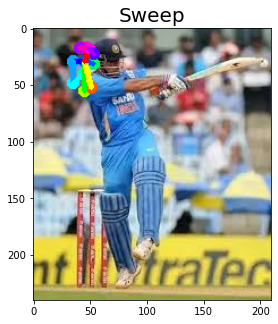

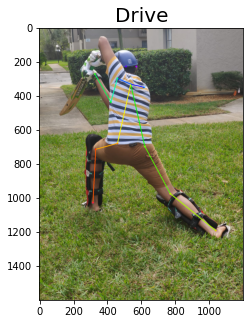

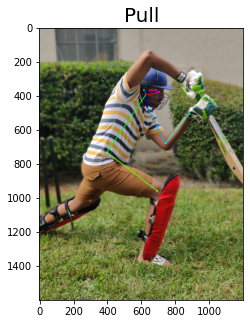

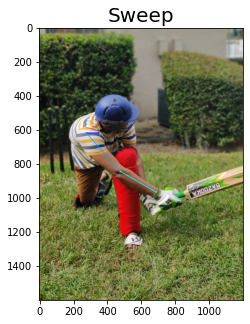

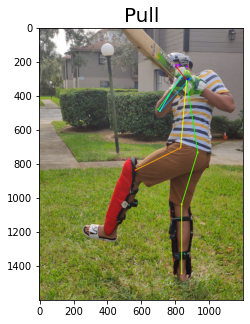

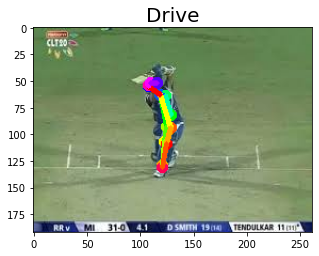

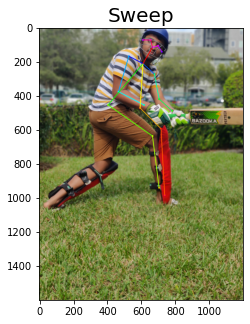

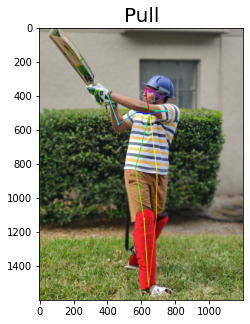

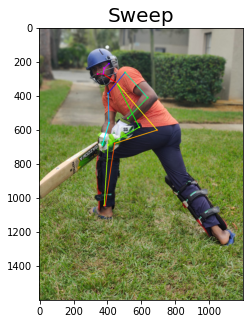

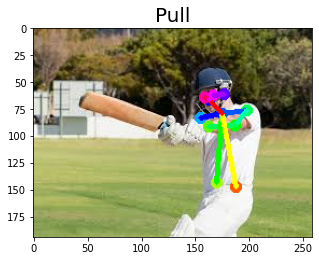

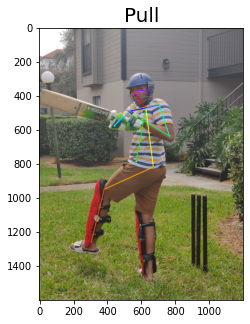

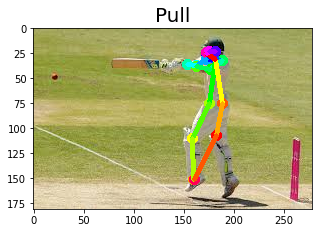

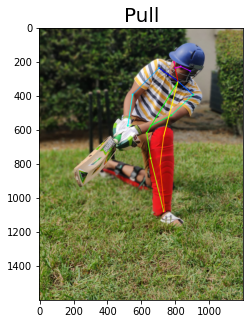

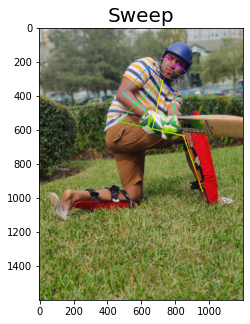

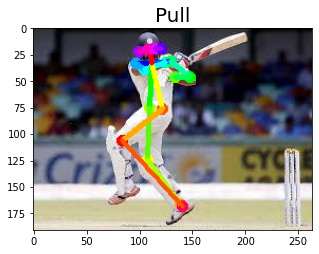

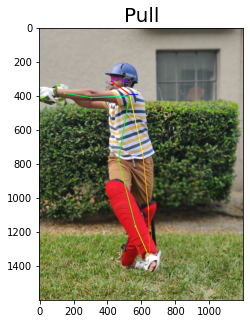

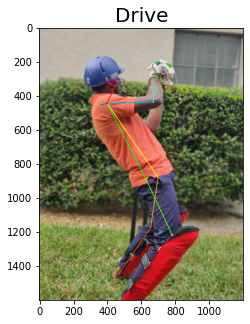

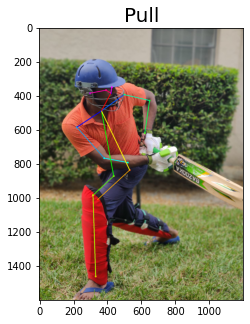

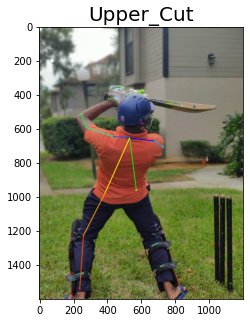

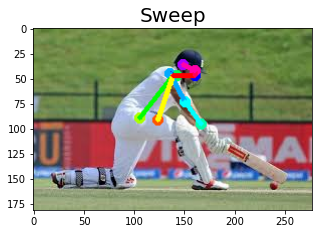

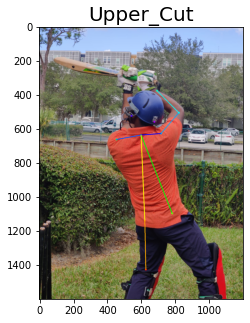

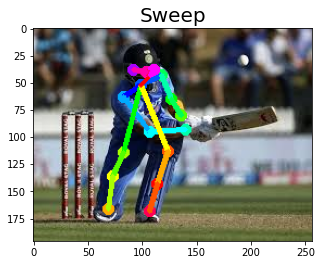

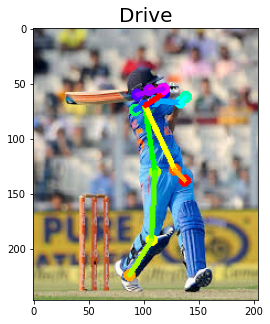

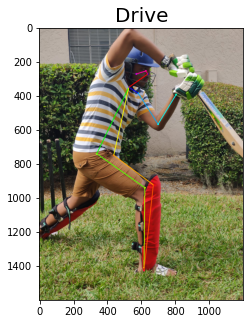

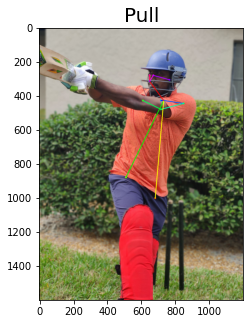

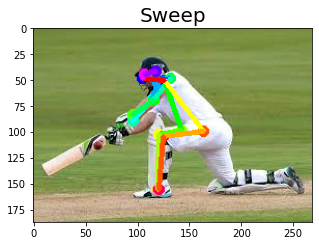

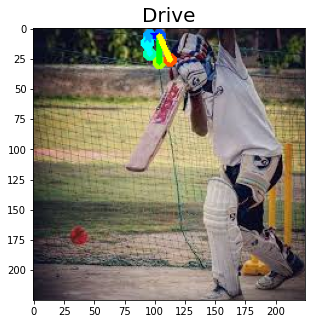

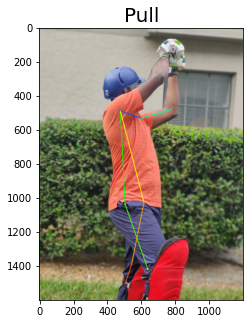

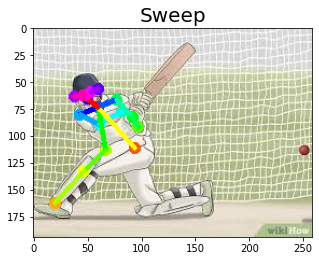

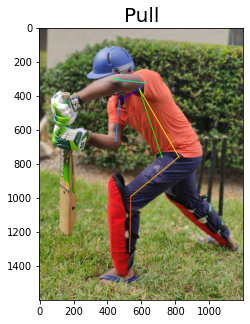

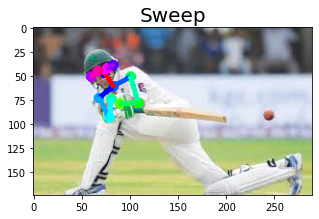

In [ ]:

for p,img,hum in zip(y_pred,testImg,testHuman):
    fig = plt.figure(figsize = (5,5))
    a = fig.add_subplot(1, 1, 1)
    
    if(p==0):
        t='Sweep'
    elif(p==1):
        t='Upper_Cut'
    elif(p==2):
        t='Drive'
    elif(p==3):
        t='Pull'

    a.set_title(t,fontsize=20)
    resultImage = TfPoseEstimator.draw_humans(img, [hum], imgcopy=False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

As we have seen model has 60% accuracy, we can see some pictures with wrong detected shots but we need to understand that our ML is not 100% accurate. Here, we achieved model using ***tf_pose*** library.